# Kaggle Competition
Box office prediction based on TMDB data

In [1]:
import pandas as pd

movies_all = pd.read_csv('/Users/juliannapiskorz/OneDrive - Imperial College London/Programming/Python/BOX OFFICE/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('/Users/juliannapiskorz/OneDrive - Imperial College London/Programming/Python/BOX OFFICE/tmdb-box-office-prediction/test.csv')

In [2]:
movies_all = movies_all.set_index("id")

In [3]:
movies_all.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
movies_all.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [5]:
movies_all.genres = movies_all.genres.fillna("Unknown")

### Potencjalne kolumny do analizy
1. budget
2. original language (ale tylko czy to jest angielski - 2575/3000 filmów mają angielski)
3. popularity (fajne, ale nie pomaga na etapie decyzji o dystrybucji?)
4. runtime (fajne, ale nie pomaga na etapie decyzji o dystrybucji?)
5. release date - oddzielnie miesiąc i rok
6. spoken languages (ale problematyczne bo każdy film może mieć więcej niż jedno entry)
7. genre - binary, kilka głównych kategorii
8. collection - binary (TAK/NIE)
9. website - binary (TAK/NIE)


In [6]:
movies = movies_all.loc[:, ["revenue", "budget", "popularity", "runtime"]]

In [7]:
movies["drama"] = movies_all.genres.map(lambda g: 'Drama' in g)
movies["comedy"] = movies_all.genres.map(lambda g: 'Comedy' in g)
movies["romance"] = movies_all.genres.map(lambda g: 'Romance' in g)
movies["thriller"] = movies_all.genres.map(lambda g: 'Thriller' in g)
movies["horror"] = movies_all.genres.map(lambda g: 'Horror' in g)
movies["crime"] = movies_all.genres.map(lambda g: 'Crime' in g)
movies["action"] = movies_all.genres.map(lambda g: 'Action' in g)
movies["family"] = movies_all.genres.map(lambda g: 'Family' in g)
movies["documentary"] = movies_all.genres.map(lambda g: 'Documentary' in g)

In [8]:
movies["org_lang_eng"] = (movies_all.original_language == "en")

In [9]:
movies_all['release_date'] = pd.to_datetime(movies_all['release_date'], format='%m/%d/%y')
movies['release_month'] = pd.DatetimeIndex(movies_all['release_date']).month
movies['release_year'] = pd.DatetimeIndex(movies_all['release_date']).year

In [10]:
movies["collection"] = movies_all.belongs_to_collection.notna()

In [11]:
movies['website'] = movies_all.homepage.notna()

In [12]:
movies.head()

,revenue,budget,popularity,runtime,drama,comedy,romance,thriller,horror,crime,action,family,documentary,org_lang_eng,release_month,release_year,collection,website
id,,,,,,,,,,,,,,,,,,
1,12314651,14000000,6.575393,93.0,False,True,False,False,False,False,False,False,False,True,2,2015,True,False
2,95149435,40000000,8.248895,113.0,True,True,True,False,False,False,False,True,False,True,8,2004,True,False
3,13092000,3300000,64.299990,105.0,True,False,False,False,False,False,False,False,False,True,10,2014,False,True
4,16000000,1200000,3.174936,122.0,True,False,False,True,False,False,False,False,False,False,3,2012,False,True
5,3923970,0,1.148070,118.0,False,False,False,True,False,False,True,False,False,False,2,2009,False,False


### Looking at NAs
There were only two rows with NA in the "runtime" column.

In [13]:
movies = movies.dropna(axis=0)

## Model evaluation
I need percentage error - because the values of the target variable (revenue) have high variability.
Kaggle: Root Mean Square Logarithmic Error

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error, mean_squared_error

movies.revenue.describe()

count    2.998000e+03
mean     6.677033e+07
std      1.375674e+08
min      1.000000e+00
25%      2.400517e+06
50%      1.681996e+07
75%      6.892583e+07
max      1.519558e+09
Name: revenue, dtype: float64

## Decision tree

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

dt_model = DecisionTreeRegressor(random_state=1)
X = movies.loc[:, movies.columns != "revenue"]
y = np.log(movies.revenue)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
print(f"Root mean squared error for the decision tree model is: {mean_squared_error(y_val, y_pred, squared=False)}")
print(f"Mean absolute percentage error for the decision tree model is: {mean_absolute_percentage_error(y_val, y_pred)}")

# cross-validation
scores = cross_val_score(dt_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Root mean squared error found using cross validation: {-scores.mean()}")

Root mean squared error for the decision tree model is: 3.1347962377290126
Mean absolute percentage error for the decision tree model is: 74464418092989.83
Root mean squared error found using cross validation: 3.0464451583538623


## Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
X = movies.loc[:, movies.columns != "revenue"]
y = np.log(movies.revenue)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared=False))
print(mean_absolute_percentage_error(np.exp(y_val), np.exp(y_pred)))

2.328440960684518
6558.583716943605


## Random Forest


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
X = movies.loc[:, movies.columns != "revenue"]
y = np.log(movies.revenue)

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rf_model.fit(X, y)
y_pred = rf_model.predict(X)

In [18]:
-scores.mean()

2.1624501347911256

Analiza modelu:

- matplotlib
- sns
- bokeh
(scatterplot, analiza outlierów, actual vs predicted)

- random forest dane (ile razy była wybierana która kolumna)
- współczynniki przy linear regression

- shap

Feature enginnering:
- PCA na keywords
- boruta (feature selection)
- facet (BCG)


# Analiza modelu

### Matplotlib

,revenue,budget,popularity,runtime,drama,comedy,romance,thriller,horror,crime,action,family,documentary,org_lang_eng,release_month,release_year,collection,website
id,,,,,,,,,,,,,,,,,,
16,198,500000,1.018477,97.0,True,False,False,False,False,True,True,False,False,False,10,2010,False,True
151,18,0,1.178642,108.0,True,False,False,False,False,False,False,False,False,True,12,1980,False,False
153,241,0,3.520171,92.0,True,False,False,False,True,False,False,False,False,True,1,1988,False,False
270,20,0,0.498877,119.0,False,False,False,False,False,False,False,False,True,True,9,2007,False,True
281,10,0,2.584025,91.0,False,False,False,True,True,False,False,False,False,True,10,1999,True,False
313,12,16000000,1.758079,97.0,True,True,False,False,False,False,False,False,False,True,9,2004,False,False
335,3,1,0.438490,140.0,True,False,False,False,False,False,True,False,False,False,5,2003,False,False
348,1,12,1.410322,84.0,True,True,False,False,False,False,False,True,False,True,10,1996,False,False
451,12,23000000,5.950792,111.0,False,True,True,False,False,False,False,False,False,True,1,2004,False,False


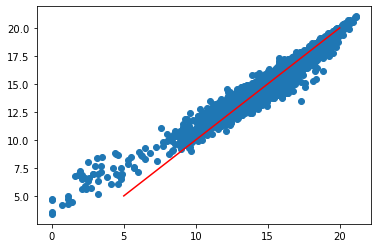

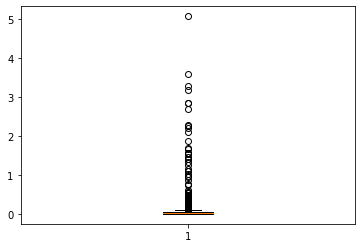

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y, y_pred)
plt.plot([5,20], [5,20], color="red")


plt.figure()
plt.boxplot((np.abs(y_pred - y))/y)

# outliers
movies[(np.abs(y_pred - y))/y > 0.4]

# I managed to find a lot of movies with incorrect revenue data

### Analiza dziwnych wartości w REVENUE

In [20]:
movies_all.sort_values(by = "revenue")[0:60]

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
348,NaN,12,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt0118172,en,The Wind in the Willows,"Jailed for his reckless driving, rambunctious ...",1.410322,/nsOM52BsDeHzc0yI27bah2OWems.jpg,...,1996-10-16,84.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Go wild in the country!,The Wind in the Willows,NaN,"[{'cast_id': 2, 'character': 'Toad', 'credit_i...","[{'credit_id': '59ce7655c3a3686aca01a522', 'de...",1
1755,NaN,2,"[{'id': 53, 'name': 'Thriller'}, {'id': 10769,...",NaN,tt0110604,en,Mute Witness,"Billy is mute, but it hasn't kept her from bec...",2.466066,/1AJujK1IjuyxvIG8pjmef9qJsnQ.jpg,...,1995-09-28,95.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,She Can't Speak. She Can't Scream. She Can't B...,Mute Witness,"[{'id': 3713, 'name': 'chase'}, {'id': 6149, '...","[{'cast_id': 22, 'character': 'Billy Hughes', ...","[{'credit_id': '52fe4775c3a36847f8136af1', 'de...",1
1918,NaN,592,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,tt0016104,en,The Merry Widow,Prince Danilo falls in love with dancer Sally ...,0.286719,/dCVkB0POblxtn3BegTNcwTPMKUP.jpg,...,2025-08-26,137.0,NaN,Released,NaN,The Merry Widow,"[{'id': 1691, 'name': 'dance'}, {'id': 10181, ...","[{'cast_id': 2, 'character': ""Sally O'Hara"", '...","[{'credit_id': '57351170c3a36802410000d5', 'de...",1
1875,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.vt4.be/vermist,tt1133617,en,Vermist,Five members of the Missing Persons Task Force...,0.229233,/kWbiNRAPLu5q065r0thIFdmQOBv.jpg,...,2007-01-01,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Missing,NaN,"[{'cast_id': 2, 'character': 'Murat Hoxha', 'c...","[{'credit_id': '52fe4838c3a36847f815cef1', 'de...",1
696,NaN,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",NaN,tt0374271,hi,Tere Naam,"Lower Caste Radhey Mohan is a no good slacker,...",1.280455,/xNH5HVOc6U7qMPh9pbUWJxzROZm.jpg,...,2003-08-15,132.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Unfortunately a true love story,Tere Naam,NaN,"[{'cast_id': 3, 'character': 'Radhe Mohan', 'c...","[{'credit_id': '52fe491ec3a36847f8189cfb', 'de...",2
335,NaN,1,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0376144,ta,Saamy,Saamy movie is all about Arusaamy (Vikram) who...,0.438490,/dIiEngfIy3G4ZP6CuhyuZa36mNW.jpg,...,2003-05-05,140.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,NaN,Saamy,NaN,"[{'cast_id': 11, 'character': 'Aaruchamy', 'cr...","[{'credit_id': '52fe4782c3a36847f813999f', 'de...",3
1542,NaN,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,tt3805180,ru,Все и сразу,NaN,0.201582,/hNsmPpl3zLG36jr4EIEd5P8I4pa.jpg,...,2014-06-05,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,All at Once,"[{'id': 642, 'name': 'robbery'}, {'id': 231149...","[{'cast_id': 3, 'character': 'Viktor', 'credit...","[{'credit_id': '53b7a7b90e0a2676b8006ab6', 'de...",3
2384,"[{'id': 369004, 'name': 'Borsalino Collection'...",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0065486,fr,Borsalino,In 1930 Marseilles two small-time crooks join ...,4.471645,/4nVSIZ3J6Z4hUMMr5d0LGqRFMRb.jpg,...,1970-05-19,126.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Borsalino,NaN,"[{'cast_id': 1, 'character': 'Fran√ßois Capell...","[{'credit_id': '531cd71cc3a3685c31006e82', 'de...",3
2118,NaN,344,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.americanadobo.com,tt0294289,en,American Adobo,The everyday struggles of people trying to bri...,0.158651,/ndSs6DPEXYZRNZdacR7Ysq7jMJ7.jpg,...,2001-09-29,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Sex is the appetizer. Love is the main course....,American Adobo,"[{'id': 10183, 'name': 'independent film'}, {'...","[{'cast_id': 1, 'character

In [21]:
movies_all = movies_all.drop([1007, 348, 1918, 1875, 696, 335, 1542, 2384, 1347, 2583, 2760, 2400, 2875, 2033, 1008, 665, 580, 2578, 2865, 1162, 16, 887, 225, 2385, 1063])
movies_all.loc[1755, "revenue"] = 1125910
movies_all.loc[2118, "revenue"] = 344992
movies_all.loc[2491, "revenue"] = 6858261
movies_all.loc[1191, "revenue"] = 7660857
movies_all.loc[640, "revenue"] = 8598593
movies_all.loc[2252, "revenue"] = 1834384
movies_all.loc[666, "revenue"] = 11514
movies_all.loc[281, "revenue"] = 10155690
movies_all.loc[1142, "revenue"] = 13746
movies_all.loc[451, "revenue"] = 12195626
movies_all.loc[313, "revenue"] = 11814019
movies_all.loc[151, "revenue"] = 40914068
movies_all.loc[2091, "revenue"] = 18369
movies_all.loc[270, "revenue"] = 20018
movies_all.loc[1885, "revenue"] = 4750602
movies_all.loc[499, "revenue"] = 25317
movies_all.loc[1139, "revenue"] = 16094974
movies_all.loc[2434, "revenue"] = 32417995
movies_all.loc[1282, "revenue"] = 8580428
movies_all.loc[2475, "revenue"] = 23462
movies_all.loc[1199, "revenue"] = 85196485
movies_all.loc[2256, "revenue"] = 6552255
movies_all.loc[1480, "revenue"] = 127257
movies_all.loc[1241, "revenue"] = 379466
movies_all.loc[1949, "revenue"] = 204612
movies_all.loc[153, "revenue"] = 241278
movies_all.loc[1801, "revenue"] = 135280
movies_all.loc[117, "revenue"] = 312954
movies_all.loc[1255, "revenue"] = 651
movies_all.loc[1377, "revenue"] = 1129408

In [22]:
movies = movies_all.loc[:, ["revenue", "budget", "popularity", "runtime"]]

movies["drama"] = movies_all.genres.map(lambda g: 'Drama' in g)
movies["comedy"] = movies_all.genres.map(lambda g: 'Comedy' in g)
movies["romance"] = movies_all.genres.map(lambda g: 'Romance' in g)
movies["thriller"] = movies_all.genres.map(lambda g: 'Thriller' in g)
movies["horror"] = movies_all.genres.map(lambda g: 'Horror' in g)
movies["crime"] = movies_all.genres.map(lambda g: 'Crime' in g)
movies["action"] = movies_all.genres.map(lambda g: 'Action' in g)
movies["family"] = movies_all.genres.map(lambda g: 'Family' in g)
movies["documentary"] = movies_all.genres.map(lambda g: 'Documentary' in g)

movies["org_lang_eng"] = (movies_all.original_language == "en")

movies_all['release_date'] = pd.to_datetime(movies_all['release_date'], format='%m/%d/%y')
movies['release_month'] = pd.DatetimeIndex(movies_all['release_date']).month
movies['release_year'] = pd.DatetimeIndex(movies_all['release_date']).year

movies["collection"] = movies_all.belongs_to_collection.notna()
movies['website'] = movies_all.homepage.notna()

movies = movies.dropna(axis=0)

lr_model = LinearRegression()
X = movies.loc[:, movies.columns != "revenue"]
y = np.log(movies.revenue)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared=False))
print(mean_absolute_percentage_error(np.exp(y_val), np.exp(y_pred)))

rf_model = RandomForestRegressor()
X = movies.loc[:, movies.columns != "revenue"]
y = np.log(movies.revenue)

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rf_model.fit(X, y)
y_pred = rf_model.predict(X)

1.9004396341384107
20.443520516653066


### Ponowna analiza Matplotlib

,revenue,budget,popularity,runtime,drama,comedy,romance,thriller,horror,crime,action,family,documentary,org_lang_eng,release_month,release_year,collection,website
id,,,,,,,,,,,,,,,,,,
1355,422,0,37.484577,99.0,True,False,False,True,False,False,False,False,False,True,6,2017,False,False


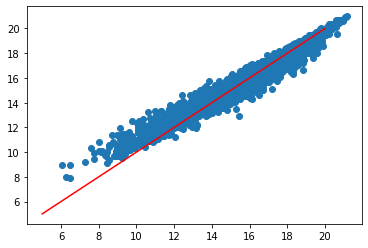

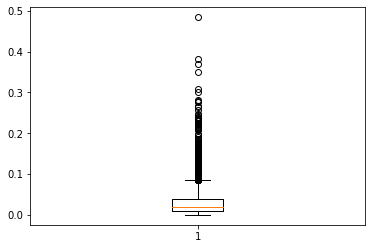

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y, y_pred)
plt.plot([5,20], [5,20], color="red")


plt.figure()
plt.boxplot((np.abs(y_pred - y))/y)

# outliers
movies[(np.abs(y_pred - y))/y > 0.4]

### Linear Regression and Random Forest Coefficients

LINEAR REGRESSION: \
Biggest influence: NOT a document (-2.39) \
Smallest influence: budget (useless, bo 798 filmów ma budżet 0)

In [24]:
print("Linear model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", lr_model.coef_[i].round(4))

Linear model coefficients:

budget = 0.0
popularity = 0.0259
runtime = 0.02
drama = -0.4672
comedy = 0.3347
romance = 0.232
thriller = 0.1034
horror = 0.0911
crime = 0.3092
action = 0.0773
family = 0.7345
documentary = -2.4435
org_lang_eng = 0.8698
release_month = 0.0115
release_year = -0.0172
collection = 0.8802
website = 0.419


In [25]:
print("Random forest feature importance:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", rf_model.feature_importances_[i].round(4))

Random forest feature importance:

budget = 0.4435
popularity = 0.1888
runtime = 0.0891
drama = 0.0135
comedy = 0.0106
romance = 0.008
thriller = 0.0093
horror = 0.0081
crime = 0.0074
action = 0.0101
family = 0.0068
documentary = 0.0075
org_lang_eng = 0.0093
release_month = 0.0485
release_year = 0.1106
collection = 0.0184
website = 0.0105


### Budget gaps

In [26]:
#checking if changing the 0s to NAs and using gradient boosting will help
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

movies_nas = movies
movies_nas.budget = movies_nas.budget.replace(0, np.nan)

hist_grad_boost = HistGradientBoostingRegressor()
X_nas = movies_nas.drop("revenue", axis=1)
y_nas = np.log(movies_nas.revenue)

scores_nas = cross_val_score(hist_grad_boost, X_nas, y_nas, cv=5, scoring='neg_root_mean_squared_error')
print(f"Root mean squared error found using cross validation: {-scores_nas.mean()}")

Root mean squared error found using cross validation: 1.625577560214397


In [27]:
#checking how would the results improve if we only took those films where budget > 500

movies_budget = movies[movies.budget > 500]
print(f"number of entries after the faulty budget is removed: {len(movies_budget)}")
rf_model_budget = RandomForestRegressor()
X_budget = movies_budget.loc[:, movies_budget.columns != "revenue"]
y_budget = np.log(movies_budget.revenue)

scores_budget = cross_val_score(rf_model_budget, X_budget, y_budget, cv=5, scoring='neg_root_mean_squared_error')
rf_model_budget.fit(X_budget, y_budget)
y_pred_budget = rf_model_budget.predict(X_budget)
print(f"Root mean squared error found using cross validation: {-scores_budget.mean()}")

number of entries after the faulty budget is removed: 2164
Root mean squared error found using cross validation: 1.4881144668302295


In [28]:
movies_budget.sort_values(by="budget").head()

,revenue,budget,popularity,runtime,drama,comedy,romance,thriller,horror,crime,action,family,documentary,org_lang_eng,release_month,release_year,collection,website
id,,,,,,,,,,,,,,,,,,
1804,15425,2500.0,0.404753,78.0,True,False,True,False,False,False,False,False,False,True,3,2007,False,False
2611,11083449,5000.0,3.447894,139.0,False,False,False,True,False,False,True,False,False,False,12,2015,False,False
2856,48482,6000.0,5.283661,69.0,True,False,False,True,False,True,False,False,False,True,9,1998,False,False
366,424760,7000.0,7.153070,77.0,True,False,False,True,False,False,False,False,False,True,10,2004,False,True
2782,13674,7300.0,0.137676,87.0,False,True,False,True,False,False,True,False,False,True,10,1998,False,False


,revenue,budget,popularity,runtime,drama,comedy,romance,thriller,horror,crime,action,family,documentary,org_lang_eng,release_month,release_year,collection,website
id,,,,,,,,,,,,,,,,,,
97,3358,2500000.0,2.942355,98.0,False,True,True,True,False,False,True,False,False,False,11,2011,False,False
312,12250,9500000.0,8.594980,168.0,True,False,True,False,False,False,False,False,False,False,5,2012,False,True
939,1938,1500000.0,5.875708,90.0,True,True,False,False,False,False,False,False,False,True,10,2012,False,False
2406,3003,2500000.0,5.465670,102.0,True,False,False,False,False,False,False,False,False,True,2,2012,False,False


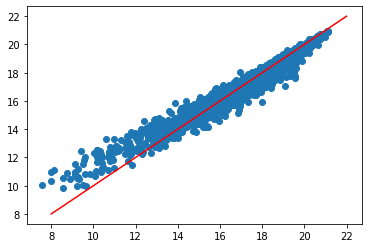

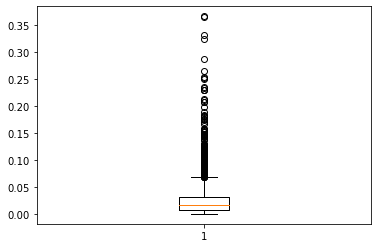

In [29]:
plt.figure()
plt.scatter(y_budget, y_pred_budget)
plt.plot([8,22], [8,22], color="red")


plt.figure()
plt.boxplot((np.abs(y_pred_budget - y_budget))/y_budget)

# outliers
movies_budget[(np.abs(y_pred_budget - y_budget))/y_budget > 0.3]

In [30]:
movies = movies_budget
X = X_budget
y = pd.Series(y_budget, index=movies_budget.index)
y_pred = pd.Series(y_pred_budget, index=movies_budget.index)

In [31]:
np.where((np.abs(y_pred_budget - y_budget))/y_budget > 0.3)

(array([  66,  219,  663, 1730]),)

In [32]:
X.index[(np.abs(y_pred_budget - y_budget))/y_budget > 0.3]

Int64Index([97, 312, 939, 2406], dtype='int64', name='id')

In [33]:
movies.popularity.describe()

count    2164.000000
mean        9.772370
std        13.807541
min         0.003013
25%         5.483647
50%         8.347168
75%        11.695508
max       294.337037
Name: popularity, dtype: float64

## SHAP Analysis

In [34]:
import shap

for c in X.columns:
    X.loc[:, c] = X.loc[:, c].astype(float)

X100 = shap.utils.sample(X, 100)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
explainer = shap.Explainer(rf_model_budget.predict, X100)
shap_values = explainer(X)

Permutation explainer: 2165it [14:21,  2.49it/s]                          


### Analizowanie outliers z użyciem Shapa

In [36]:
movies_all.loc[97]

belongs_to_collection                                                  NaN
budget                                                             2500000
genres                   [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
homepage                                                               NaN
imdb_id                                                          tt1683921
original_language                                                       fr
original_title                                                Nuit Blanche
overview                 Vincent is a crooked cop whose drug heist goes...
popularity                                                        2.942355
poster_path                               /aPRXwAKxGb92RdnhA9FwGfnBaku.jpg
production_companies     [{'name': 'Procirep', 'id': 311}, {'name': 'Ca...
production_countries              [{'iso_3166_1': 'FR', 'name': 'France'}]
release_date                                           2011-11-14 00:00:00
runtime                  

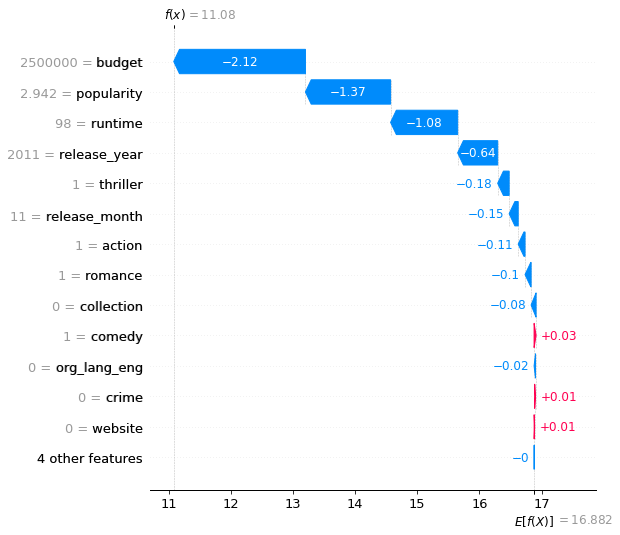

In [37]:
shap.plots.waterfall(shap_values[66], max_display=14)

In [38]:
movies_all.loc[132]

belongs_to_collection                                                  NaN
budget                                                             6000000
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
homepage                                                               NaN
imdb_id                                                          tt1582271
original_language                                                       en
original_title                                             The Good Doctor
overview                 Dr. Martin Blake, who has spent his life looki...
popularity                                                        8.278079
poster_path                               /qAkb7Rm9dMVz3wJuSXmj0wiJTd7.jpg
production_companies                                                   NaN
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                           2011-01-01 00:00:00
runtime                  

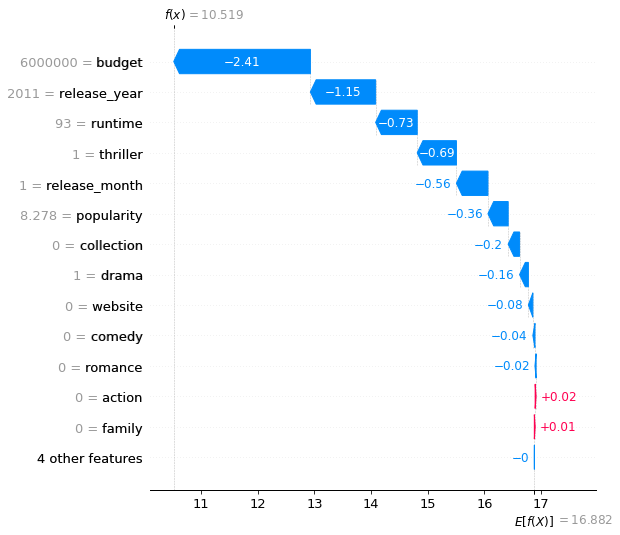

In [39]:
shap.plots.waterfall(shap_values[93], max_display=14)

In [40]:
movies_all.loc[939]

belongs_to_collection                                                  NaN
budget                                                             1500000
genres                   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
homepage                                                               NaN
imdb_id                                                          tt1885300
original_language                                                       en
original_title                                               Best Man Down
overview                 A newlywed couple cancels their honeymoon and ...
popularity                                                        5.875708
poster_path                               /2akSCt635Bp4tX94DYybRpnTkzk.jpg
production_companies         [{'name': 'KODA Entertainment', 'id': 16947}]
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                           2012-10-20 00:00:00
runtime                  

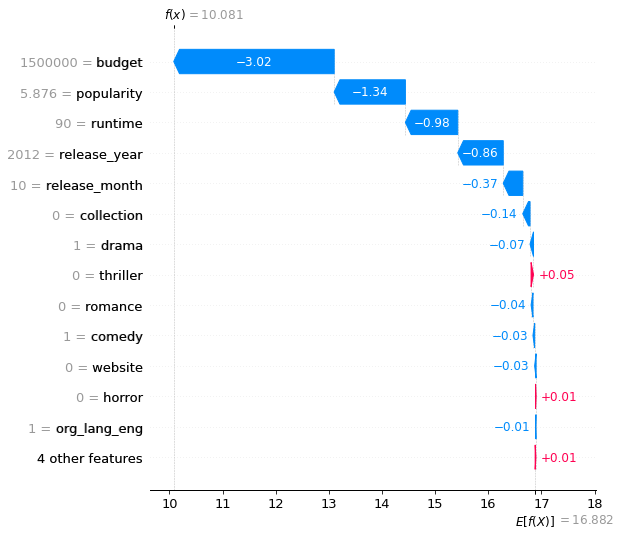

In [41]:
shap.plots.waterfall(shap_values[663], max_display=14)

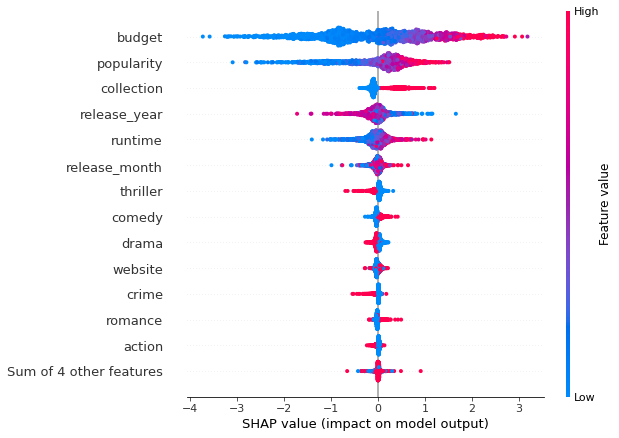

In [42]:
shap.plots.beeswarm(shap_values, max_display=14)

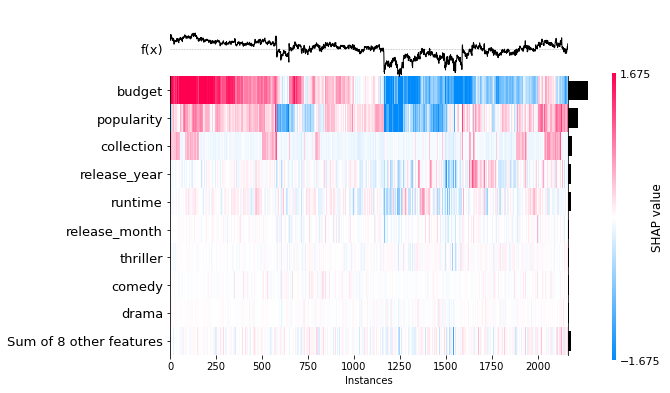

In [43]:
shap.plots.heatmap(shap_values)

## Production companies

In [44]:
movies_all.production_companies

id
1       [{'name': 'Paramount Pictures', 'id': 4}, {'na...
2             [{'name': 'Walt Disney Pictures', 'id': 2}]
3       [{'name': 'Bold Films', 'id': 2266}, {'name': ...
4                                                     NaN
5                                                     NaN
                              ...                        
2996    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
2997    [{'name': 'Memfis Film', 'id': 321}, {'name': ...
2998    [{'name': 'New Line Cinema', 'id': 12}, {'name...
2999    [{'name': 'Jersey Films', 'id': 216}, {'name':...
3000    [{'name': 'Lions Gate Films', 'id': 35}, {'nam...
Name: production_companies, Length: 2975, dtype: object

In [45]:
production = set([])

data = movies_all.loc[movies.index].production_companies
data = data.dropna()

for s in data:
    s = s[1:-2]
    s = s.split("}, {")
    for prod in s:
        start = prod.find("'name': ") + 9
        stop = prod.find("id'") - 4
        production.add(prod[start:stop])

print(len(production))

2808


In [46]:
production_df = movies_all.loc[movies.index, ["production_companies", "revenue"]]
for prod in production:
    production_df[prod] = data.map(lambda g: prod in g)

production_df = production_df.drop("production_companies", axis=1)

In [47]:
production_df = production_df.fillna(False)
production_df.head()

,revenue,Pistolero Productions LLC,20th Century Fox Television,Georgetown Productions Inc.,Alan Landsburg Productions,Phoenix Pictures,Marvel Enterprises,Prescience,Tim Burton Productions,Apotheosis Media Group,...,UKFS,Carthago Films S.a.r.l.,PSO International,Storm King Productions,Curmudgeon Films,Unanimous Pictures,Media Asia Film,Red Om Films,Nadiadwala Grandson Entertainment,Televiziunea Romana (TVR1)
id,,,,,,,,,,,,,,,,,,,,,
1,12314651,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,95149435,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13092000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3261638,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
movies_complete = movies_all.loc[movies.index]
revenue_production = [movies_complete.revenue[production_df.loc[:, prod]].mean() for prod in production]
revenue_production_false = [movies_complete.revenue[~(production_df.loc[:, prod])].mean() for prod in production]
revenue_production = pd.Series(revenue_production, index=production, name="average_revenue")
revenue_production_false = pd.Series(revenue_production_false, index=production, name="average_revenue_false")
number_production = [sum(production_df.loc[:, prod]) for prod in production]
number_production = pd.Series(number_production, index=production, name="no_films")
production_summary = pd.concat([revenue_production, revenue_production_false, number_production], axis=1)
production_summary["revenue_difference"] = production_summary.average_revenue - production_summary.average_revenue_false

In [49]:
production_summary.no_films[production_summary.no_films >= 20]

United Artists                             37
Paramount                                 140
Lionsgate                                  27
Twentieth Century Fox                     130
StudioCanal                                21
Working Title Films                        23
Relativity Media                           47
Walt Disney Pictures                       55
Walt Disney                                63
DreamWorks SKG                             27
Twentieth Century Fox Film Corporation    122
DreamWorks                                 40
TriStar Pictures                           41
Canal+                                     45
Epsilon Motion Pictures                    20
Universal Pictures                        156
Fox Searchlight Pictures                   23
Columbia Pictures                         132
New Line Cinema                            68
Dune Entertainment                         37
Fox 2000 Pictures                          22
Regency Enterprises               

In [50]:
production_summary = production_summary.loc[production_summary.no_films >= 20]

In [51]:
production_df = production_df.loc[:, production_summary.index]

In [52]:
from boruta import BorutaPy

rf_production = RandomForestRegressor(n_jobs=-1, max_depth=5)
boruta_production = BorutaPy(rf_production, n_estimators = 'auto', verbose=2, random_state=1)
X_production = production_df
y_production = movies_complete.revenue
boruta_production.fit(np.array(X_production), np.array(y_production))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	31
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	31
I

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=48,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7FF94680F640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FF94680F640, verbose=2)

In [53]:
production_shorter = production_summary.index
production_shorter = np.array(list(production_shorter))
production_selection = list(production_shorter[boruta_production.support_]) + list(production_shorter[boruta_production.support_weak_])

In [54]:
production_summary.loc[production_selection]

,average_revenue,average_revenue_false,no_films,revenue_difference
Walt Disney Pictures,3.384616e+08,8.133751e+07,55,2.571241e+08
Walt Disney,3.278188e+08,8.067759e+07,63,2.471412e+08
Warner Bros.,1.427746e+08,8.289152e+07,180,5.988307e+07


In [55]:
movies_with_production = pd.concat([movies, production_df.loc[:, production_selection]], axis=1, join="inner")
movies_with_production.head()

# random forest
rf_model_prod = RandomForestRegressor()
X_prod = movies_with_production.drop("revenue", axis=1)
y_prod = np.log(movies_with_production.revenue)

scores_prod = cross_val_score(rf_model_prod, X_prod, y_prod, cv=5, scoring='neg_root_mean_squared_error')
rf_model_prod.fit(X_prod, y_prod)
y_pred_prod = rf_model_prod.predict(X_prod)

In [56]:
print("Cross validation scores obtained in Random Forest: ", -scores_prod.mean())
print("\nRandom forest feature importance:\n")
for i in range(X_prod.shape[1]):
    print(X_prod.columns[i], "=", rf_model_prod.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.4905939778209745

Random forest feature importance:

budget = 0.4738
popularity = 0.195
runtime = 0.0884
drama = 0.0103
comedy = 0.0094
romance = 0.0075
thriller = 0.0132
horror = 0.0075
crime = 0.008
action = 0.0078
family = 0.0032
documentary = 0.0013
org_lang_eng = 0.0075
release_month = 0.0451
release_year = 0.0848
collection = 0.0236
website = 0.0105
Walt Disney Pictures = 0.0003
Walt Disney = 0.0008
Warner Bros. = 0.002


In [57]:
movies_with_production_all = pd.concat([movies, production_df], axis=1, join="inner")
movies_with_production_all.head()

# random forest
rf_model_prod_all = RandomForestRegressor()
X_prod_all = movies_with_production_all.drop("revenue", axis=1)
y_prod_all = np.log(movies_with_production_all.revenue)

scores_prod_all = cross_val_score(rf_model_prod_all, X_prod_all, y_prod_all, cv=5, scoring='neg_root_mean_squared_error')
rf_model_prod_all.fit(X_prod_all, y_prod_all)
y_pred_prod_all = rf_model_prod_all.predict(X_prod_all)

In [58]:
print("Cross validation scores obtained in Random Forest: ", -scores_prod_all.mean())
print("\nRandom forest feature importance:\n")
for i in range(X_prod_all.shape[1]):
    print(X_prod_all.columns[i], "=", rf_model_prod_all.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.4861299764671003

Random forest feature importance:

budget = 0.4698
popularity = 0.1889
runtime = 0.0772
drama = 0.0088
comedy = 0.0084
romance = 0.0066
thriller = 0.0107
horror = 0.0076
crime = 0.0081
action = 0.0067
family = 0.0027
documentary = 0.0011
org_lang_eng = 0.0067
release_month = 0.0426
release_year = 0.0755
collection = 0.0232
website = 0.01
United Artists = 0.0007
Paramount = 0.0011
Lionsgate = 0.0007
Twentieth Century Fox = 0.0015
StudioCanal = 0.0037
Working Title Films = 0.0009
Relativity Media = 0.0004
Walt Disney Pictures = 0.0002
Walt Disney = 0.0007
DreamWorks SKG = 0.0002
Twentieth Century Fox Film Corporation = 0.0012
DreamWorks = 0.0002
TriStar Pictures = 0.0016
Canal+ = 0.0038
Epsilon Motion Pictures = 0.0003
Universal Pictures = 0.0019
Fox Searchlight Pictures = 0.0017
Columbia Pictures = 0.0013
New Line Cinema = 0.0009
Dune Entertainment = 0.0003
Fox 2000 Pictures = 0.0005
Regency Enterprises = 0.0002
Tou

### PCA on production companies

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_production)

PCA(n_components=15)

In [78]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 0.05)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    print(cv)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

[0.13055523 0.24988642 0.33783178 0.41423447 0.48272295 0.54462442
 0.59765464 0.63382378 0.66699201 0.69780209 0.7272104  0.7514608
 0.77406508 0.79596456 0.81592732]


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

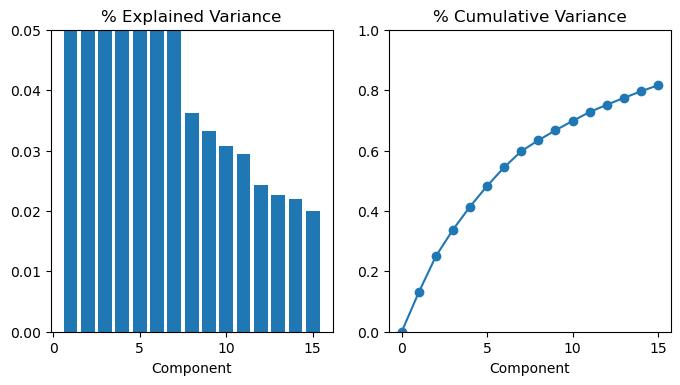

In [79]:
plot_variance(pca)

In [81]:
X_production_pca = pca.transform(X_production)
X_production_pca = pd.DataFrame(X_production_pca, index=movies.index, columns=[f"prod_pca_{n}" for n in range(1, 16)])

In [83]:
movies_prod_pca = pd.concat([movies, X_production_pca], axis=1)

In [84]:
# random forest
rf_model_prod_pca = RandomForestRegressor()
X_prod_pca = movies_prod_pca.drop("revenue", axis=1)
y_prod_pca = np.log(movies_prod_pca.revenue)

scores_prod_pca = cross_val_score(rf_model_prod_pca, X_prod_pca, y_prod_pca, cv=5, scoring='neg_root_mean_squared_error')
rf_model_prod_pca.fit(X_prod_pca, y_prod_pca)
y_pred_prod_pca = rf_model_prod_pca.predict(X_prod_pca)

In [85]:
print("Cross validation scores obtained in Random Forest: ", -scores_prod_pca.mean())
print("\nRandom forest feature importance:\n")
for i in range(X_prod_pca.shape[1]):
    print(X_prod_pca.columns[i], "=", rf_model_prod_pca.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.4597000664932487

Random forest feature importance:

budget = 0.4598
popularity = 0.1737
runtime = 0.072
drama = 0.0065
comedy = 0.0074
romance = 0.0058
thriller = 0.0102
horror = 0.0062
crime = 0.0069
action = 0.0062
family = 0.0028
documentary = 0.0011
org_lang_eng = 0.0074
release_month = 0.0362
release_year = 0.0643
collection = 0.0212
website = 0.0075
prod_pca_1 = 0.0112
prod_pca_2 = 0.0044
prod_pca_3 = 0.0049
prod_pca_4 = 0.0049
prod_pca_5 = 0.007
prod_pca_6 = 0.0051
prod_pca_7 = 0.0046
prod_pca_8 = 0.0046
prod_pca_9 = 0.0051
prod_pca_10 = 0.0083
prod_pca_11 = 0.0053
prod_pca_12 = 0.0075
prod_pca_13 = 0.0072
prod_pca_14 = 0.0061
prod_pca_15 = 0.0185


In [86]:
movies = movies_prod_pca

# Keywords

In [87]:
movies_all.Keywords

id
1       [{'id': 4379, 'name': 'time travel'}, {'id': 9...
2       [{'id': 2505, 'name': 'coronation'}, {'id': 42...
3       [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
4       [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
5                                                     NaN
                              ...                        
2996    [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...
2997    [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...
2998    [{'id': 441, 'name': 'assassination'}, {'id': ...
2999    [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...
3000    [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...
Name: Keywords, Length: 2975, dtype: object

In [88]:
keywords = set([])

data = movies_all.loc[movies.index].Keywords
data = data.dropna()

for s in data:
    s = s[1:-2]
    s = s.split("}, {")
    for key in s:
        start = key.find("'name': ") + 9
        keywords.add(key[start:-1])

print(len(keywords))

6495


In [89]:
keywords_df = movies_all.loc[movies.index, ["Keywords", "revenue"]]
for keyword in keywords:
    keywords_df[keyword] = data.map(lambda g: keyword in g)

keywords_df = keywords_df.drop("Keywords", axis=1)

In [90]:
keywords_df = keywords_df.fillna(False)
keywords_df.head()

,revenue,repentance,marriage proposal,cockroach,christian,imperial japan,woman reporter,lesbian interest,cinematographer,business man,...,taliban,sadist,biracial,sergeant,mountain,birthday party,tibet,destiny,ira,mental
id,,,,,,,,,,,,,,,,,,,,,
1,12314651,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,95149435,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13092000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3261638,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
movies_complete = movies_all.loc[movies.index]
revenue_keyword = [movies_complete.revenue[keywords_df.loc[:, key]].mean() for key in keywords]
revenue_keyword_false = [movies_complete.revenue[~(keywords_df.loc[:, key])].mean() for key in keywords]
revenue_keyword = pd.Series(revenue_keyword, index=keywords, name="average_revenue")
revenue_keyword_false = pd.Series(revenue_keyword_false, index=keywords, name="average_revenue_false")
number_keyword = [sum(keywords_df.loc[:, key]) for key in keywords]
number_keyword = pd.Series(number_keyword, index=keywords, name="no_films")
keyword_summary = pd.concat([revenue_keyword, revenue_keyword_false, number_keyword], axis=1)
keyword_summary["revenue_difference"] = keyword_summary.average_revenue - keyword_summary.average_revenue_false

In [92]:
keyword_summary.no_films[keyword_summary.no_films >= 20]

bank          25
daughter      50
india         27
plan          59
marriage      42
              ..
journalist    23
mexico        20
corruption    35
ira           49
mental        20
Name: no_films, Length: 307, dtype: int64

In [93]:
keyword_drop = list(keyword_summary.index[keyword_summary.no_films < 20])
keywords_df = keywords_df.drop(keyword_drop, axis=1)

In [94]:
from boruta import BorutaPy

rf_keywords = RandomForestRegressor(n_jobs=-1, max_depth=5)
boruta = BorutaPy(rf_keywords, n_estimators = 'auto', verbose=2, random_state=1)
X_keywords = keywords_df.drop("revenue", axis=1)
y_keywords = keywords_df.revenue
boruta.fit(np.array(X_keywords), np.array(y_keywords))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	307
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	288
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	17
Rejected: 	288
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	17
Rejected: 	288
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	17
Rejected: 	288
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	16
Rejected: 	288
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	16
Rejected: 	288
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	16
Rejected: 	288
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	16
Rejected: 	288
Iteration: 	16 / 100
Confirmed: 	5
Tentat

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=116,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7FF94680FA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FF94680FA40, verbose=2)

In [95]:
keywords_shorter = keywords - set(keyword_drop)
keywords_shorter = np.array(list(keywords_shorter))
keywords_selection = list(keywords_shorter[boruta.support_]) + list(keywords_shorter[boruta.support_weak_])

In [96]:
keyword_summary.loc[keywords_selection]

,average_revenue,average_revenue_false,no_films,revenue_difference
bet,6.277360e+07,8.811851e+07,21,-2.534490e+07
ball,7.029237e+07,8.832247e+07,54,-1.803010e+07
son,8.762235e+07,8.789539e+07,181,-2.730374e+05
dea,1.036798e+08,8.663601e+07,157,1.704377e+07
club,4.116993e+07,8.837426e+07,23,-4.720434e+07
birth,1.475864e+08,8.720287e+07,24,6.038353e+07
death,1.207794e+08,8.622801e+07,103,3.455140e+07
gangster,4.060457e+07,8.835803e+07,22,-4.775347e+07
love,9.466583e+07,8.731551e+07,164,7.350327e+06
suspense,9.804110e+07,8.763205e+07,50,1.040905e+07


### Including keywords in the model

In [97]:
movies_with_keywords = pd.concat([movies, keywords_df.loc[:, keywords_selection]], axis=1, join="inner")
movies_with_keywords.head()

# random forest
rf_model_keys = RandomForestRegressor()
X_keys = movies_with_keywords.drop("revenue", axis=1)
y_keys = np.log(movies_with_keywords.revenue)

scores_keys = cross_val_score(rf_model_keys, X_keys, y_keys, cv=5, scoring='neg_root_mean_squared_error')
rf_model_keys.fit(X_keys, y_keys)
y_pred_keys = rf_model_keys.predict(X_keys)

In [98]:
print("Cross validation scores obtained in Random Forest: ", -scores_keys.mean())
print("\nRandom forest feature importance:\n")
for i in range(X_keys.shape[1]):
    print(X_keys.columns[i], "=", rf_model_keys.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.457566173998662

Random forest feature importance:

budget = 0.4593
popularity = 0.1667
runtime = 0.068
drama = 0.006
comedy = 0.0073
romance = 0.0052
thriller = 0.0091
horror = 0.0059
crime = 0.0063
action = 0.0053
family = 0.0023
documentary = 0.0013
org_lang_eng = 0.0069
release_month = 0.0338
release_year = 0.0631
collection = 0.0199
website = 0.0074
prod_pca_1 = 0.0113
prod_pca_2 = 0.0046
prod_pca_3 = 0.006
prod_pca_4 = 0.0041
prod_pca_5 = 0.0067
prod_pca_6 = 0.0043
prod_pca_7 = 0.0041
prod_pca_8 = 0.005
prod_pca_9 = 0.0049
prod_pca_10 = 0.0075
prod_pca_11 = 0.0047
prod_pca_12 = 0.007
prod_pca_13 = 0.0065
prod_pca_14 = 0.0062
prod_pca_15 = 0.0184
bet = 0.0007
ball = 0.0004
son = 0.0038
dea = 0.0017
club = 0.0024
birth = 0.0005
death = 0.0024
gangster = 0.0002
love = 0.003
suspense = 0.0024
entity = 0.001
assassin = 0.0002
lover = 0.0013
action = 0.0002
time = 0.0023
future = 0.002


## PCA on keywords

In [138]:
X_keywords = keywords_df.drop("revenue", axis=1)
pca = PCA(n_components=25)
pca.fit(X_keywords)

PCA(n_components=25)

[0.05026149 0.08999827 0.11632026 0.13970886 0.16097659 0.17979542
 0.19701596 0.21369155 0.22884451 0.24364053 0.25764188 0.27034432
 0.28255809 0.29455109 0.30593793 0.31693117 0.32764491 0.33799247
 0.34790808 0.35774813 0.36718322 0.37624055 0.38518495 0.39374839
 0.40224434]


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

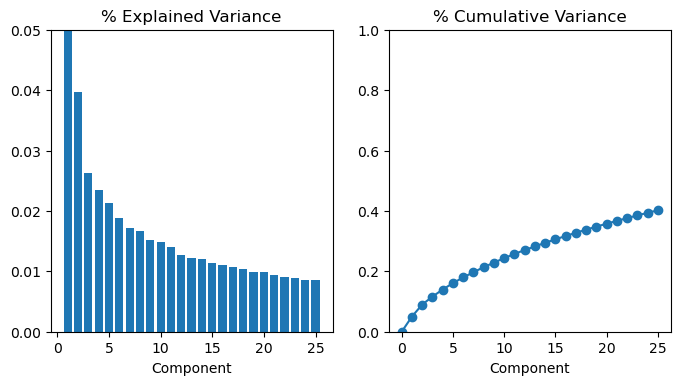

In [139]:
plot_variance(pca)

In [140]:
X_keywords = pca.transform(X_keywords)
X_keywords = pd.DataFrame(X_keywords, index=movies.index, columns=[f"pca_{n}" for n in range(1, 26)])

In [141]:
movies_pca = pd.concat([movies, X_keywords], axis=1)

In [142]:
movies_pca.head()

,revenue,budget,popularity,runtime,drama,comedy,romance,thriller,horror,crime,...,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25
id,,,,,,,,,,,,,,,,,,,,,
1,12314651,14000000.0,6.575393,93.0,False,True,False,False,False,False,...,0.061341,0.389463,0.308481,0.319253,0.059183,-0.056934,0.515702,0.392584,0.229209,0.744622
2,95149435,40000000.0,8.248895,113.0,True,True,True,False,False,False,...,0.232301,0.157697,-0.370725,0.090574,0.070693,0.260877,0.194606,0.140457,-0.085602,-0.031595
3,13092000,3300000.0,64.299990,105.0,True,False,False,False,False,False,...,0.148222,-0.583049,-0.037015,0.276561,0.151349,-0.427826,-0.011639,0.543498,-0.289204,-0.081697
4,16000000,1200000.0,3.174936,122.0,True,False,False,True,False,False,...,-0.245903,-0.358739,-0.455133,-0.128008,-0.042136,0.046862,0.315824,-0.132538,0.043087,0.215869
6,3261638,8000000.0,0.743274,83.0,False,False,False,False,False,False,...,-0.030753,0.014707,-0.029675,-0.033035,0.041570,-0.028055,-0.010768,-0.007071,0.013903,0.013452


In [143]:
# random forest
rf_model_pca = RandomForestRegressor()
X_pca = movies_pca.drop("revenue", axis=1)
y_pca = np.log(movies_pca.revenue)

scores_pca = cross_val_score(rf_model_pca, X_pca, y_pca, cv=5, scoring='neg_root_mean_squared_error')
rf_model_pca.fit(X_pca, y_pca)
y_pred_pca = rf_model_pca.predict(X_pca)

In [144]:
print("Cross validation scores obtained in Random Forest: ", -scores_pca.mean())
print(f"Mean absolute percentage error for the decision tree model is: {mean_absolute_percentage_error(np.exp(y_pca), np.exp(y_pred_pca))}")


print("\nRandom forest feature importance:\n")
for i in range(X_pca.shape[1]):
    print(X_pca.columns[i], "=", rf_model_pca.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.462172130831749
Mean absolute percentage error for the decision tree model is: 0.5072935753133273

Random forest feature importance:

budget = 0.4298
popularity = 0.1324
runtime = 0.0342
drama = 0.0022
comedy = 0.0027
romance = 0.0013
thriller = 0.0041
horror = 0.0027
crime = 0.0022
action = 0.0017
family = 0.0007
documentary = 0.0005
org_lang_eng = 0.0026
release_month = 0.0125
release_year = 0.0276
collection = 0.016
website = 0.0028
prod_pca_1 = 0.0072
prod_pca_2 = 0.0022
prod_pca_3 = 0.0035
prod_pca_4 = 0.0018
prod_pca_5 = 0.0038
prod_pca_6 = 0.0028
prod_pca_7 = 0.0027
prod_pca_8 = 0.0033
prod_pca_9 = 0.0028
prod_pca_10 = 0.0067
prod_pca_11 = 0.0023
prod_pca_12 = 0.0036
prod_pca_13 = 0.0044
prod_pca_14 = 0.0031
prod_pca_15 = 0.0133
bet = 0.0003
ball = 0.0001
son = 0.0003
dea = 0.0001
club = 0.0008
birth = 0.0001
death = 0.0002
gangster = 0.0001
love = 0.0003
suspense = 0.0004
entity = 0.0003
assassin = 0.0
lover = 0.0002
action 

In [106]:
pd.concat([pd.Series(y_pca, index=movies.index), pd.Series(y_pred_pca, index=movies.index)], axis=1)

,revenue,0
id,,
1,16.326300,16.560566
2,18.370959,18.455692
3,16.387512,16.137168
4,16.588099,15.621312
6,14.997740,14.653627
...,...,...
2993,14.009332,14.084498
2994,19.206486,18.899441
2998,18.309266,18.224264


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff945d07520>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff945d07850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff93ec68f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff945f6fdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8ddb0c3d0>],
 'means': []}

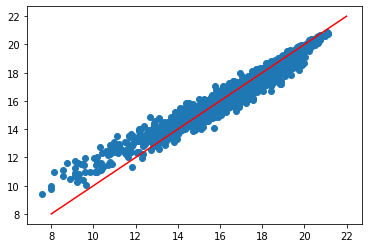

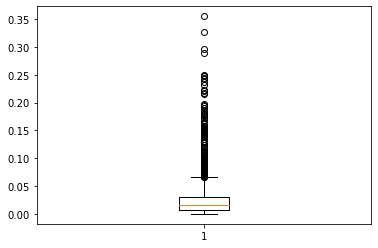

In [107]:
plt.figure()
plt.scatter(y_pca, y_pred_pca)
plt.plot([8,22], [8,22], color="red")


plt.figure()
plt.boxplot((np.abs(y_pred_pca - y_pca))/y_pca)

# outliers
#movies_budget[(np.abs(y_pred_budget - y_budget))/y_budget > 0.3]

# Actors

In [109]:
movies_all.cast

id
1       [{'cast_id': 4, 'character': 'Lou', 'credit_id...
2       [{'cast_id': 1, 'character': 'Mia Thermopolis'...
3       [{'cast_id': 5, 'character': 'Andrew Neimann',...
4       [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
5       [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
                              ...                        
2996    [{'cast_id': 2, 'character': 'Rock Reilly', 'c...
2997    [{'cast_id': 5, 'character': 'Bobo', 'credit_i...
2998    [{'cast_id': 10, 'character': 'Samantha Caine ...
2999    [{'cast_id': 8, 'character': 'Reuben Feffer', ...
3000    [{'cast_id': 2, 'character': 'Nathan Harper', ...
Name: cast, Length: 2975, dtype: object

In [110]:
actors = set([])

data = movies_all.loc[movies.index].cast
data = data.dropna()

for a in data:
    a = a[1:-2]
    a = a.split("}, {")
    for actor in a:
        start = actor.find("'name': ") + 9
        stop = actor.find("'order': ") - 3
        actors.add(actor[start:stop])

In [111]:
print(len(actors))

31763


In [112]:
actors_df = movies_all.loc[movies.index, ["cast", "revenue"]]
for actor in actors:
    actors_df[actor] = data.map(lambda g: actor in g)

actors_df = actors_df.drop("cast", axis=1)
actors_df = actors_df.fillna(False)

In [113]:
actors_df.head()

,revenue,,Hiroshi Mikami,Alexandru Papadopol,Julie Lauren,Khadijah Haqq,Freddie Joe Farnsworth,Curt May,Ana Rosa Smith Avila,Donald Douglas,...,Antonio St. James,Suzy Southam,Anna Enger,Kate Magowan,Tipu Taheer,Eddie Osei,Symona Boniface,Sarah Freeman,Jane Wyatt,Jay Scorpio
id,,,,,,,,,,,,,,,,,,,,,
1,12314651,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,95149435,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13092000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3261638,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
movies_complete = movies_all.loc[movies.index]
revenue_actor = [movies_complete.revenue[actors_df.loc[:, actor]].mean() for actor in actors]
revenue_actor_false = [movies_complete.revenue[~(actors_df.loc[:, actor])].mean() for actor in actors]
revenue_actor = pd.Series(revenue_actor, index=actors, name="average_revenue")
revenue_actor_false = pd.Series(revenue_actor_false, index=actors, name="average_revenue_false")
number_actor = [sum(actors_df.loc[:, actor]) for actor in actors]
number_actor = pd.Series(number_actor, index=actors, name="no_films")
actor_summary = pd.concat([revenue_actor, revenue_actor_false, number_actor], axis=1)
actor_summary["revenue_difference"] = actor_summary.average_revenue - actor_summary.average_revenue_false

In [115]:
actor_summary.no_films[actor_summary.no_films >= 10]

                     2152
Frank Langella         11
Vin Diesel             11
Charlize Theron        12
Kathy Bates            11
                     ... 
Matthew Broderick      11
Beth Grant             10
Robert Patrick         11
Duffy                  18
Fabian                 11
Name: no_films, Length: 310, dtype: int64

In [116]:
actor_drop = list(actor_summary.index[actor_summary.no_films < 10])
actor_drop += list(actor_summary.index[actor_summary.no_films > 80])
actors_df = actors_df.drop(actor_drop, axis=1)

In [117]:
rf_actors = RandomForestRegressor(n_jobs=-1, max_depth=5)
boruta_actors = BorutaPy(rf_actors, n_estimators = 'auto', verbose=2, random_state=1)
X_actors = actors_df.drop("revenue", axis=1)
y_actors = actors_df.revenue
boruta_actors.fit(np.array(X_actors), np.array(y_actors))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	297
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	267
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	16
Rejected: 	267
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	16
Rejected: 	267
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	16
Rejected: 	267
Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	267
Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	267
Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	267
Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	267
Iteration: 	16 / 100
Confirmed: 	2

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=152,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7FF8DDF1DD40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FF8DDF1DD40, verbose=2)

In [118]:
actors_shorter = actors - set(actor_drop)
actors_shorter = np.array(list(actors_shorter))
actors_selection = list(actors_shorter[boruta_actors.support_]) + list(actors_shorter[boruta_actors.support_weak_])

In [119]:
actor_summary.loc[actors_selection]

,average_revenue,average_revenue_false,no_films,revenue_difference
Matthew McConaughey,4.686263e+07,8.808208e+07,11,-4.121945e+07
Justin Long,2.800411e+07,8.817843e+07,11,-6.017432e+07
Jon Voight,1.905227e+08,8.734810e+07,11,1.031746e+08
James Remar,1.349013e+08,8.758833e+07,13,4.731300e+07
Tiffany,1.185846e+08,8.733831e+07,37,3.124628e+07
Take,1.382742e+08,8.730730e+07,24,5.096687e+07
Christopher Lee,5.032044e+08,8.555658e+07,12,4.176478e+08
Cameron Diaz,1.761680e+08,8.742144e+07,11,8.874654e+07
John Cho,1.270728e+08,8.767227e+07,11,3.940050e+07
Danny Huston,9.490546e+07,8.783334e+07,12,7.072124e+06


In [120]:
movies_with_actors = pd.concat([movies, actors_df.loc[:, actors_selection]], axis=1, join="inner")
movies_with_actors.head()

# random forest
rf_model_actors = RandomForestRegressor()
X_actors = movies_with_actors.drop("revenue", axis=1)
y_actors = np.log(movies_with_actors.revenue)

scores_actors = cross_val_score(rf_model_actors, X_actors, y_actors, cv=5, scoring='neg_root_mean_squared_error')
rf_model_actors.fit(X_actors, y_actors)
y_pred_actors = rf_model_actors.predict(X_actors)

In [121]:
print("Cross validation scores obtained in Random Forest: ", -scores_actors.mean())
print(f"Mean absolute percentage error for the decision tree model is: {mean_absolute_percentage_error(np.exp(y_actors), np.exp(y_pred_actors))}")


print("\nRandom forest feature importance:\n")
for i in range(X_actors.shape[1]):
    print(X_actors.columns[i], "=", rf_model_actors.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.4484326177497837
Mean absolute percentage error for the decision tree model is: 0.5045858479047235

Random forest feature importance:

budget = 0.453
popularity = 0.1655
runtime = 0.0625
drama = 0.0058
comedy = 0.0069
romance = 0.0053
thriller = 0.0092
horror = 0.0056
crime = 0.008
action = 0.0052
family = 0.0023
documentary = 0.0016
org_lang_eng = 0.0061
release_month = 0.0321
release_year = 0.0572
collection = 0.0204
website = 0.0071
prod_pca_1 = 0.0092
prod_pca_2 = 0.0041
prod_pca_3 = 0.0051
prod_pca_4 = 0.0039
prod_pca_5 = 0.0064
prod_pca_6 = 0.0048
prod_pca_7 = 0.0033
prod_pca_8 = 0.0048
prod_pca_9 = 0.0048
prod_pca_10 = 0.0092
prod_pca_11 = 0.0053
prod_pca_12 = 0.0062
prod_pca_13 = 0.0069
prod_pca_14 = 0.0049
prod_pca_15 = 0.0207
bet = 0.0006
ball = 0.0004
son = 0.0032
dea = 0.002
club = 0.002
birth = 0.0006
death = 0.0025
gangster = 0.0003
love = 0.0029
suspense = 0.0025
entity = 0.0009
assassin = 0.0003
lover = 0.0012
action

## PCA on actors

In [122]:
X_actors = actors_df.drop("revenue", axis=1)
y_actors = actors_df.revenue

pca_actors = PCA(n_components = 220)
pca_actors.fit(X_actors)

PCA(n_components=220)

[0.01809264 0.03543506 0.05114345 0.06511058 0.07888107 0.09143286
 0.10364137 0.11454247 0.12419862 0.13300189 0.14152362 0.14978203
 0.15783973 0.16557725 0.1731969  0.18066615 0.18808505 0.19526565
 0.20226741 0.20922313 0.21596396 0.22270102 0.2294195  0.23590326
 0.24233787 0.24867297 0.25495806 0.261212   0.26741067 0.2734636
 0.27943954 0.28536874 0.2912235  0.29702872 0.3027864  0.30845151
 0.31400064 0.31951423 0.32499901 0.33046747 0.33590424 0.34128511
 0.34662836 0.35188896 0.35709643 0.36227273 0.36740982 0.37251156
 0.37758495 0.38263707 0.38760273 0.39255088 0.39747657 0.40234539
 0.40718433 0.41200377 0.41677226 0.42152521 0.42622086 0.43091186
 0.43553524 0.44014478 0.44473377 0.44928408 0.45378725 0.45826941
 0.46272871 0.46716033 0.47155803 0.47591768 0.48026952 0.48457881
 0.48886306 0.49313683 0.4973713  0.50159983 0.50578989 0.50994469
 0.51406619 0.51816811 0.52225508 0.52630584 0.53032968 0.53433803
 0.53834492 0.5422687  0.54618009 0.55007487 0.5539513  0.55776

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

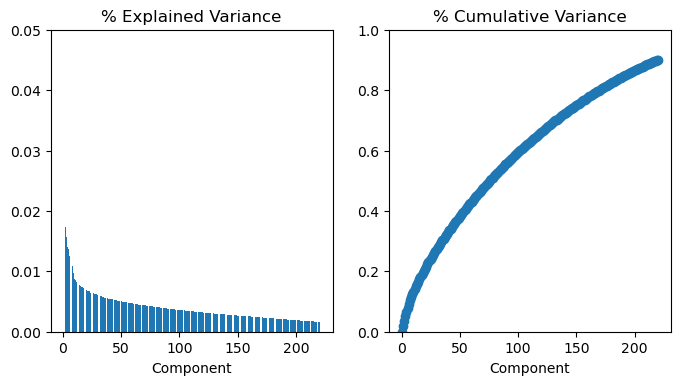

In [123]:
plot_variance(pca_actors)

In [124]:
X_actors = pca_actors.transform(X_actors)
X_actors = pd.DataFrame(X_actors, index=movies.index, columns=[f"pca_actors_{n}" for n in range(1, 221)])

In [125]:
movies_actors = pd.concat([movies, X_actors], axis=1)

In [126]:
# random forest
rf_model_actors_pca = RandomForestRegressor()
X_actors_pca = movies_actors.drop("revenue", axis=1)
y_actors_pca = np.log(movies_actors.revenue)

scores_actors_pca = cross_val_score(rf_model_actors_pca, X_actors_pca, y_actors_pca, cv=5, scoring='neg_root_mean_squared_error')
rf_model_actors_pca.fit(X_actors_pca, y_actors_pca)
y_pred_actors_pca = rf_model_actors_pca.predict(X_actors_pca)

In [127]:
print("Cross validation scores obtained in Random Forest: ", -scores_actors_pca.mean())
print(f"Mean absolute percentage error for the decision tree model is: {mean_absolute_percentage_error(np.exp(y_actors_pca), np.exp(y_pred_actors_pca))}")


print("\nRandom forest feature importance:\n")
for i in range(X_actors_pca.shape[1]):
    print(X_actors_pca.columns[i], "=", rf_model_actors_pca.feature_importances_[i].round(4))

Cross validation scores obtained in Random Forest:  1.5095384501376288
Mean absolute percentage error for the decision tree model is: 0.5351911035326749

Random forest feature importance:

budget = 0.4342
popularity = 0.1289
runtime = 0.0339
drama = 0.0027
comedy = 0.0024
romance = 0.0023
thriller = 0.0042
horror = 0.0042
crime = 0.0022
action = 0.0025
family = 0.0024
documentary = 0.0011
org_lang_eng = 0.0033
release_month = 0.0124
release_year = 0.0326
collection = 0.0154
website = 0.0024
prod_pca_1 = 0.006
prod_pca_2 = 0.0016
prod_pca_3 = 0.0029
prod_pca_4 = 0.0016
prod_pca_5 = 0.0036
prod_pca_6 = 0.0021
prod_pca_7 = 0.0017
prod_pca_8 = 0.0021
prod_pca_9 = 0.0026
prod_pca_10 = 0.0052
prod_pca_11 = 0.0026
prod_pca_12 = 0.0038
prod_pca_13 = 0.0031
prod_pca_14 = 0.0022
prod_pca_15 = 0.0136
bet = 0.0002
ball = 0.0002
son = 0.0013
dea = 0.0007
club = 0.0005
birth = 0.0003
death = 0.0003
gangster = 0.0
love = 0.0006
suspense = 0.0024
entity = 0.0002
assassin = 0.0001
lover = 0.0003
action

# Hyperparameter tuning

Parameters to be tuned:
- n_estimators (random forest - number of trees)
- max_features (random forest)
- number of features from PCA on keywords

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestRegressor()
grid_values = {'n_estimators': [20, 50, 100, 200],'max_features':[None, "sqrt", 0.2, 0.4, 0.6, 0.8]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'neg_root_mean_squared_error')
grid_clf_acc.fit(X_pca, y_pca)

In [ ]:
grid_clf_acc.best_estimator_

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, max_features=0.4)

scores = cross_val_score(rf_model, X_pca, y_pca, cv=5, scoring='neg_root_mean_squared_error')
rf_model.fit(X_pca, y_pca)
y_pred = rf_model.predict(X_pca)

In [ ]:
print("Cross validation scores obtained in Random Forest: ", -scores.mean())
print(f"Mean absolute percentage error for the decision tree model is: {mean_absolute_percentage_error(np.exp(y_pca), np.exp(y_pred))}")
